# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = r'/content/drive/MyDrive/extracurricular/YBIGTA/2024년 1학기: 24대 운영진/24대 운영진/24-1 YBIGTA 공유드라이브/1. 24기 신입 교육세션/2024-1 교육세션/0116 시각화/diamonds.csv'
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [ ]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

<Axes: xlabel='price', ylabel='Count'>

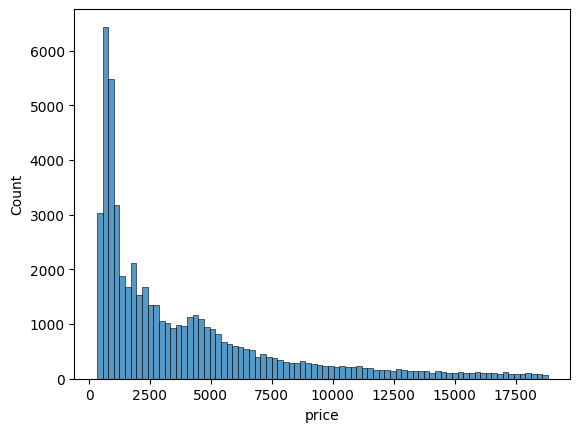

In [ ]:
sns.histplot(df['price'])

<Axes: xlabel='carat', ylabel='Count'>

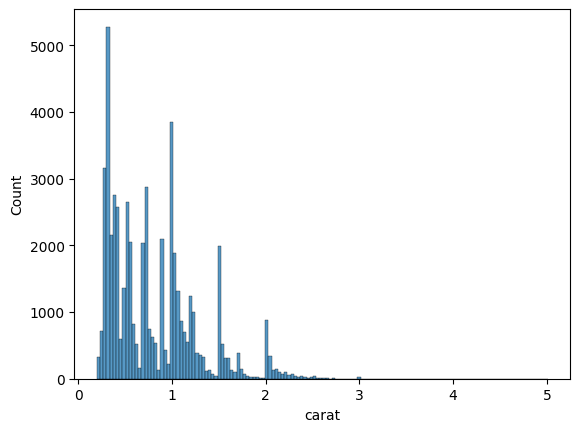

In [ ]:
sns.histplot(df['carat'])

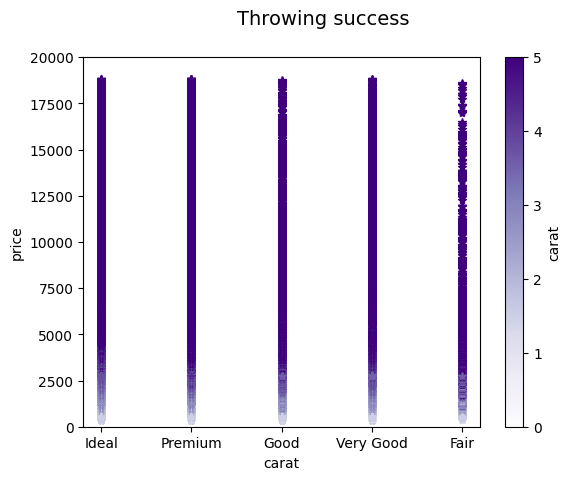

In [ ]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(cut,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("carat")
ax.set_ylabel("price")
ax.set_ylim(0, 20000)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


<Axes: xlabel='carat', ylabel='price'>

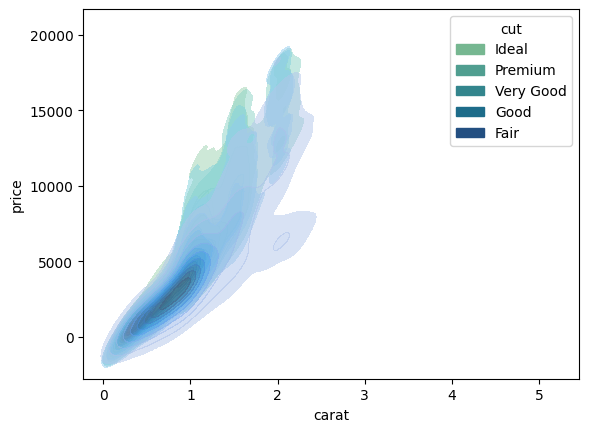

In [ ]:
sns.kdeplot(
   data=df, x="carat", y = 'price', hue="cut",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

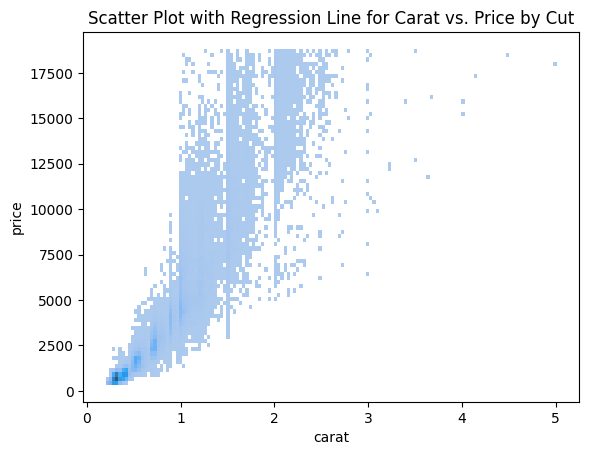

In [ ]:
sns.histplot(x="carat", y="price", data=df)
plt.title("Scatter Plot with Regression Line for Carat vs. Price by Cut")
plt.show()

## Visualization with Seaborn

In [ ]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

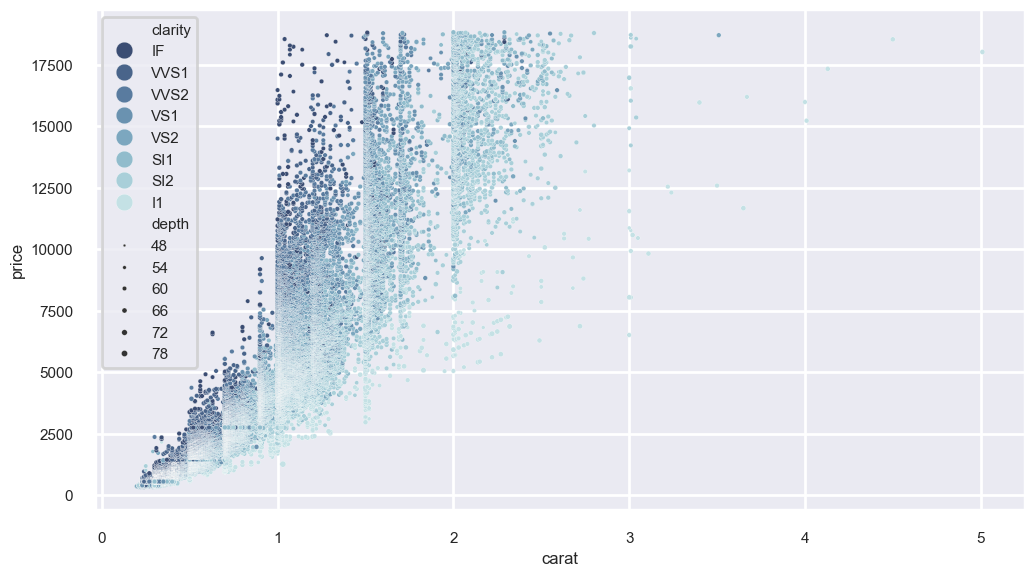

In [ ]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

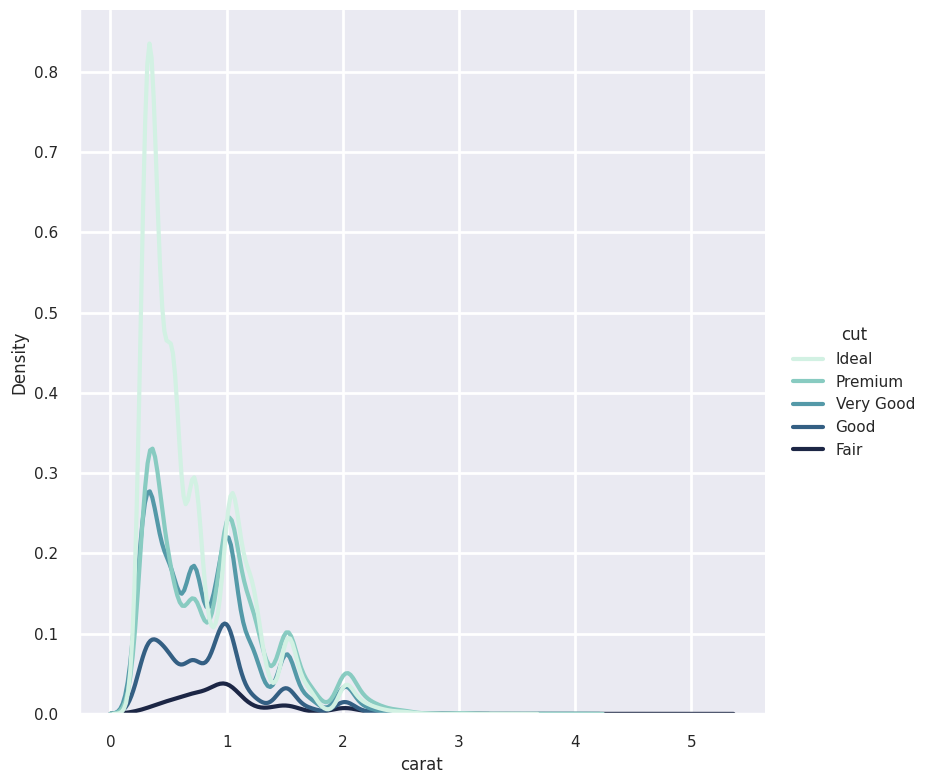

In [45]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=8,
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (600자 이내)

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

- 1번 시각화
> * 첫 번째로, 'Throwing Success'라는 시각화 제목의 의미를 이해하기가 힘들다.
> *  다음으로, y축 변수인 price의 값은 0에서 20000 정도까지의 범위를 가지는데, 현재 시각화의 axes range는 0에서 5000까지밖에 표시되어 있지 않다
> * 또한 x축 변수는 'cut'인데, label은 'carat'이 잘못 붙여져있다. 마지막으로, 전체적인 그래프의 의도를 파악하기 힘들다
> * cut의 유형에 따른 price와 carat의 분포를 확인하는 것이 목적인 것 같으나,  Ideal부터 Very Good까지 매우 유사한 시각화 결과를 보이고 있어 cut의 유형에 따라 분포가 달라지는지 파악하기에 적절하지 않다고 생각한다.
> * 개선점 : 적절한 제목 붙이기, y축의 범위 조정 및 각 축의 적절한 이름 붙이기, cut의 유형에 따라 그래프를 분리하고, 각각의 그래프에 carat과 price를 x축과 y축으로 놓아 이들의 상관성 파악하기


- 2번 시각화
> * 우선 시각화 결과에 적절한 제목이 붙여져 있지 않다
> * 또한 clarity를 점의 색상으로 표현했으나, l1에 가까워질수록 색상이 연해져 잘 구분되지 않고, depth를 점의 크기로 표현했지만, 데이터가 너무 많아 점의 크기가 큰 데이터만 상대적으로 잘 확인되고, 그렇지 않은 데이터는 확인이 어렵다.
> * 전체적인 그래프로서는, 하나의 시각화에 너무 많은 정보를 담으려고 시도하다보니 복잡한 결과가 나온 것 같다. carat과 price의 상관관계, 그리고 clarity를 색상으로 표현함으로써 이들의 관계는 어느 정도 파악되지만, depth까지 표현하는 것은 실패했다고 생각한다.
> * 개선점 : 적절한 제목 붙이기, grid를 조절해 옅은 색의 clarity도 잘 표현되게끔 표현하기, 데이터가 겹치더라도 좀 더 잘 구분되게끔 점의 불투명도를 낮추고, 테두리색을 지정하기

- 3번 시각화
> * 마찬가지로 시각화 결과에 적절한 제목이 붙여져 있지 않다.
> * carat의 수치에 따른 cut의 비율을 밀도로 표현한 그래프로 의도는 어느정도 명확하지만, 표현 방식에 문제가 있다고 생각한다. carat이 5에 가까운 데이터는 매우 적고, 해당하는 데이터의 cut 범주는 모두 fair인데, 그래프에서는 이를 밀도로 표현했기 때문에 fair의 밀도만 1을 차지하는 결과가 나타났다.
> * 즉 y축이 density이기 때문에 소수의 데이터에서 하나의 클래스만 존재하더라도 편향된 결과가 출력될 수 있다.
> * 개선점 : 적절한 제목 붙이기, multiple을 'fill'이 아닌 'layer'로 지정해 데이터의 개수가 시각화 결과에 반영되도록 설정하기

In [ ]:
# 여기에 공통과제 2번 코드를 작성해주시면 됩니다. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주면 더욱 높은 점수를 받으실 수 있습니다!

* 1번 시각화 개선

[태블로 퍼블릭 링크](https://public.tableau.com/app/profile/jongjin.kim/viz/01162/1#1)

> 우선 1번 시각화에서 제목이 적절하지 않았기 때문에, 'Cut의 범주에 따른 Price와 Carat의 관계'라는 제목을 새로 붙였습니다.

> 또한 Cut의 종류에 따라 그래프를 분리하고, Price와 Carat의 관계를 각각 산점도로 나타냈습니다. 이때 Cut의 범주들을 가로로 배치해 범주별 Carat의 값이 차이가 있는지를 확인할 수 있도록 했습니다. 추가로 Carat이 높아질수록 더 짙은 색깔을 할당했습니다.

> 마지막으로 흰색 바탕에서는 점들이 잘 확인이 안 될 수 있기 때문에, 회색 grid로 변경해 나타냈습니다.

* 추가로 1번 시각화를 seaborn에서도 개선해보았습니다...

<Figure size 640x480 with 0 Axes>

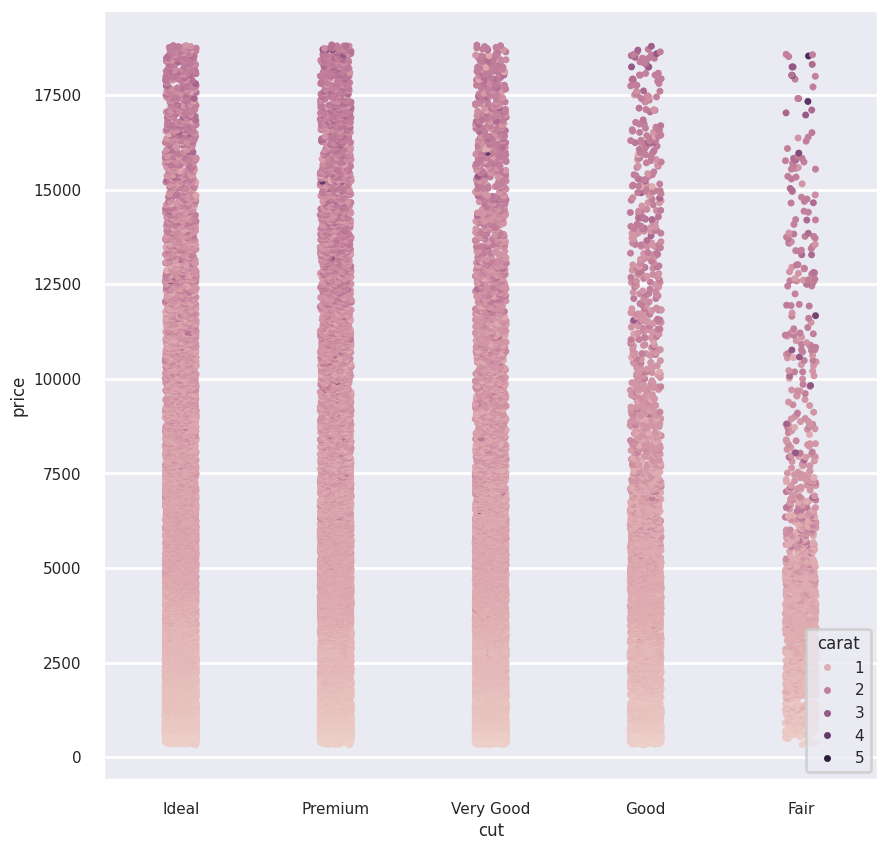

In [58]:
plt.suptitle("Scatter Plot of Carat vs. Price by Cut", y=1.02)
plt.figure(figsize=(10, 10))
sns.stripplot(x='cut', y='price', data=df, hue = 'carat')
plt.legend(title="carat",loc='lower right');

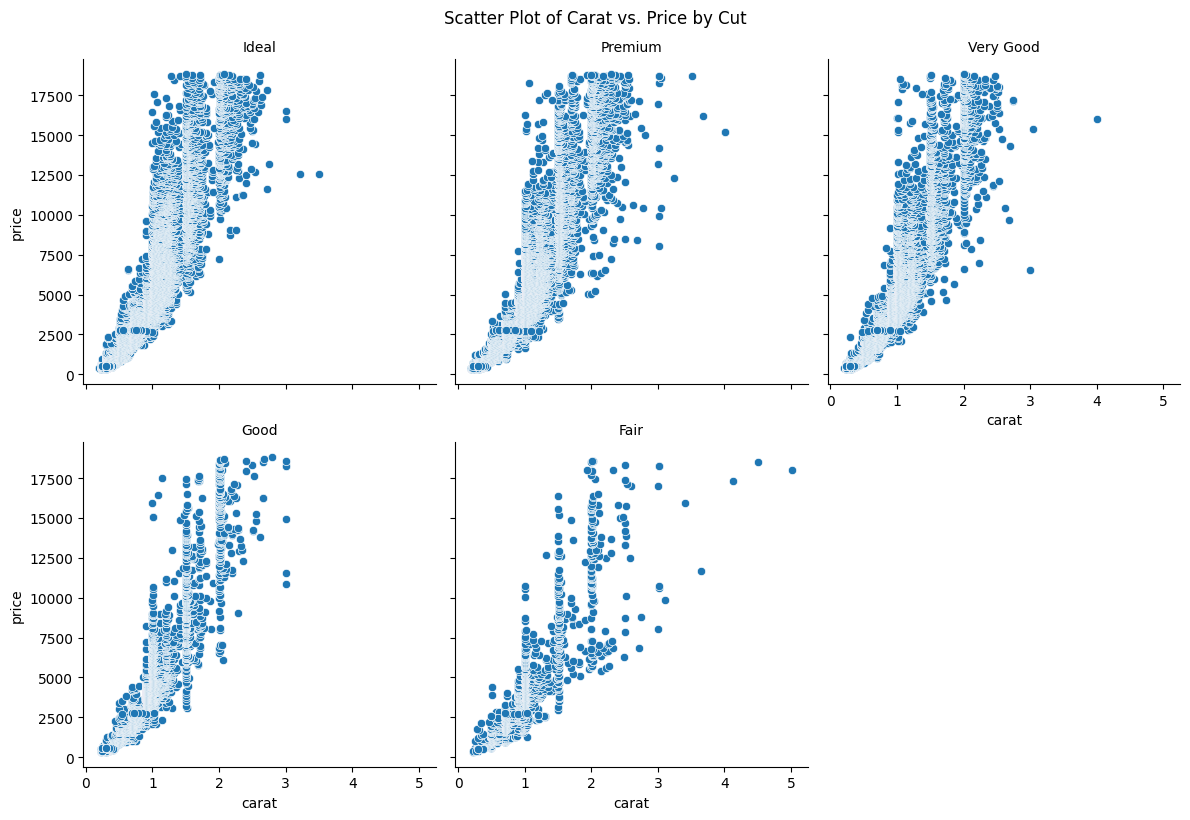

In [ ]:
g = sns.FacetGrid(df, col="cut", col_wrap=3, height=4)
g.map(sns.scatterplot, "carat", "price")
g.set_titles(col_template="{col_name}")
plt.suptitle("Scatter Plot of Carat vs. Price by Cut", y=1.02)
plt.show()

# 시각화 추가과제
https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link

파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안

In [ ]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.

[추가과제 태블로 퍼블릭 링크 - Coffee Chain Sales 분석](https://public.tableau.com/app/profile/jongjin.kim/viz/0116_17059075070160/CoffeeChainSales#1)

* Coffee chain sales 데이터를 태블로로 분석해 보았습니다. 아직 기초 단계라 막대 그래프로밖에 표현하지 못한 점 양해 부탁드립니다...

* 질문 : 각 Product Line 별로 Profit의 차이가 있는가?
> * 확인한 결과, Product Line과 Type에서는 유의미한 차이가 없었지만, Product 개별로 평균 Profit의 차이를 볼 수 있었습니다.
> * 가장 낮은 평균 Profit을 가진 Green Tea를 살펴본 결과, 4개의 주에서 음수의 평균 Profit을 가지고, 그 중에서도 Nevada 주의 2개 매장이 가장 심각한 문제를 가짐을 볼 수 있었습니다.
> * 결론적으로 해당 매장에서의 Green Tea 메뉴에 대한 개선이 필요함을 태블로의 스토리로 작성해보았습니다.

* 추후 개선 방안 : Nevada의 두 매장의 다른 메뉴에 대한 Profit은 양호한지, Green Tea 메뉴의 Profit과 Margin, Total Expenses가 저조한 이유는 무엇일지에 대해 더 분석해볼 수 있겠습니다.